### Draw climate data from HYRAS files

The HYRAS dataset from the German Metereological Service (DWD) contents metereological information in grid format of 5x5 km$^2$ resolution. This information is derived from observed data from metereological stations (1951-2015).

The metereological variables to train the models consist of : mean temperature, precipitation and relative humidity. 

In [1]:
#Import libraries
import netCDF4 as nc

import geopandas as gpd
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
from pyproj import Transformer

In [3]:
#Load netCDF files
rpath="C:/Users/GomezOspina.M/MGO/" #Root path
rhfile = rpath+ 'data/Gesamtdatensatz/hurs_hyras/hurs_hyras4episodes_12.5_1951_v2.0.nc'
rh = nc.Dataset(rhfile)

### Re-project  rotated pole grid domain

The climate data is in rotated pole grid. In order to joining with the groundwater level data and plot the information, a reprojection is needed.  

In [4]:
rh

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Tue Oct 17 07:32:22 2017: cdo remapcon,/kp/kpbkp/hyras/progs/hyras4episodes/ReKliEs-De_Grid -setgrid,/kp/kpbkp/reklies-de/intpol/PREPROCESSING/ETRS_05.griddes2 /kp/kp01/hyras/tmp/hurs/hurs_hyras_5_1951_v2.0.nc /kp/kp01/hyras/output/hyras4episodes/hurs/v2.0/hurs_hyras4episodes_12.5_1951_v2.0.nc
    source: surface observation
    institution: Deutscher Wetterdienst
    title: gridded_humidity_dataset_(HYRAS-HURS)
    project_id: Expertennetzwerk
    realization: v2.0
    contact: Stefan Kraehenmann, stefan.kraehenmann@dwd.de; Simona Hoepp, Simona-Andrea.Hoepp@dwd.de
    creation_date: 2017-06-02T23:54:46z
    tracking_id: fc5f0cc5-cc4b-473c-95e8-e6e6cf5856b0
    conventions: CF-1.6
    conventionsURL: http://cfconventions.org/cf-conventions/v1.6.0/cf-conventions.html
    CDO: Climate

In [13]:
for var in rh.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 rlon(rlon)
    standard_name: projection_x_coordinate
    long_name: longitude in rotated pole grid
    units: degrees
    axis: X
unlimited dimensions: 
current shape = (424,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 rlat(rlat)
    standard_name: projection_y_coordinate
    long_name: latitude in rotated pole grid
    units: degrees
    axis: Y
unlimited dimensions: 
current shape = (412,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int32 rotated_pole()
    grid_mapping_name: rotated_latitude_longitude
    grid_north_pole_latitude: 39.25
    grid_north_pole_longitude: -162.0
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    units: days since 1951-01-01
    calendar: proleptic_gregori

In [10]:
trans = Transformer.from_crs('epsg:4326', '+proj=ob_tran +o_proj=longlat +o_lon_p=-162 +o_lat_p=39.25 +lon_0=180', always_xy=True)
lon = rh.variables['rlon'][:]
lat = rh.variables['rlat'][:]

(8.26762637607723, 48.95553171592225)

In [14]:
lons, lats = [] ,[]
for lo, la in zip(lon[:], lat[:]):
    lonv, latv= trans.transform(lo,la)
    lons.append(lonv)
    lats.append(latv)

<IPython.core.display.Javascript object>


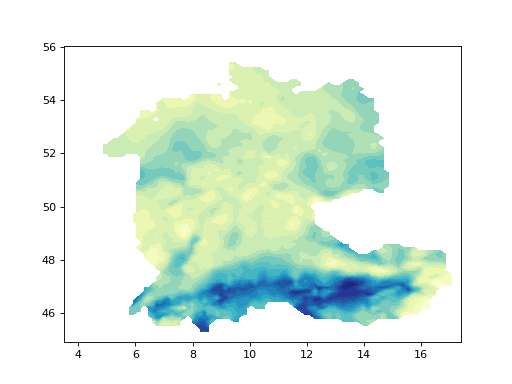

In [43]:
c=100
plt.contourf(lons[c:], lats[c:], rh['hurs'][0,c:,c:412], 20, cmap=plt.get_cmap('YlGnBu_r'))